In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from figure import plots

# Dataset info

In [2]:
tlist = pd.read_csv('./Dataset/target_list.tsv', sep='\t', index_col='chembl_tid')

tlist['threshold'] = 0
for tname in tlist.index:
    df    = pd.read_csv('./Dataset/Data/%s.tsv'%tname, sep='\t', index_col=0)
    thres = df['thres'].iloc[0]
    tlist.loc[tname, 'thres'] = thres
    
axv_stats = pd.read_csv('./Dataset/Stats/axv.tsv', sep='\t', index_col=0)
used_targets = np.unique([s.split('-')[0] for s in axv_stats.index])
tlist = tlist.loc[used_targets]

In [3]:
tlist.head()

,Unnamed: 0,entry,entry_name,protein_names,protein_families,organism,ec_number,gene_names(primary),gene_ontology(molecular_function),primary_name,#mmp,#mms,machine1,machine2,predictable_trtssplit,threshold,thres
chembl_tid,,,,,,,,,,,,,,,,,
CHEMBL1075323,22,P14625,ENPL_HUMAN,Endoplasmin (94 kDa glucose-regulated protein)...,Heat shock protein 90 family,Homo sapiens (Human),NaN,HSP90B1,ATP binding [GO:0005524]; calcium ion binding ...,Endoplasmin,672,4,True,False,True,0,1.112321
CHEMBL1800,41,P34998,CRFR1_HUMAN,Corticotropin-releasing factor receptor 1 (CRF...,G-protein coupled receptor 2 family,Homo sapiens (Human),NaN,CRHR1,corticotrophin-releasing factor receptor activ...,Corticotropin-releasing factor receptor 1,361,34,False,True,True,0,2.065648
CHEMBL1862,42,P00519,ABL1_HUMAN,Tyrosine-protein kinase ABL1 (EC 2.7.10.2) (Ab...,"Protein kinase superfamily, Tyr protein kinase...",Homo sapiens (Human),2.7.10.2,ABL1,actin filament binding [GO:0051015]; actin mon...,Tyrosine-protein kinase ABL1,355,43,True,False,True,0,1.808464
CHEMBL1902,31,P62942,FKB1A_HUMAN,Peptidyl-prolyl cis-trans isomerase FKBP1A (PP...,"FKBP-type PPIase family, FKBP1 subfamily",Homo sapiens (Human),5.2.1.8,FKBP1A,activin binding [GO:0048185]; FK506 binding [G...,Peptidyl-prolyl cis-trans isomerase FKBP1A,463,11,False,True,True,0,1.313816
CHEMBL2034,28,P04150,GCR_HUMAN,Glucocorticoid receptor (GR) (Nuclear receptor...,"Nuclear hormone receptor family, NR3 subfamily",Homo sapiens (Human),NaN,NR3C1,core promoter sequence-specific DNA binding [G...,Glucocorticoid receptor,554,58,True,False,True,0,0.998438


/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


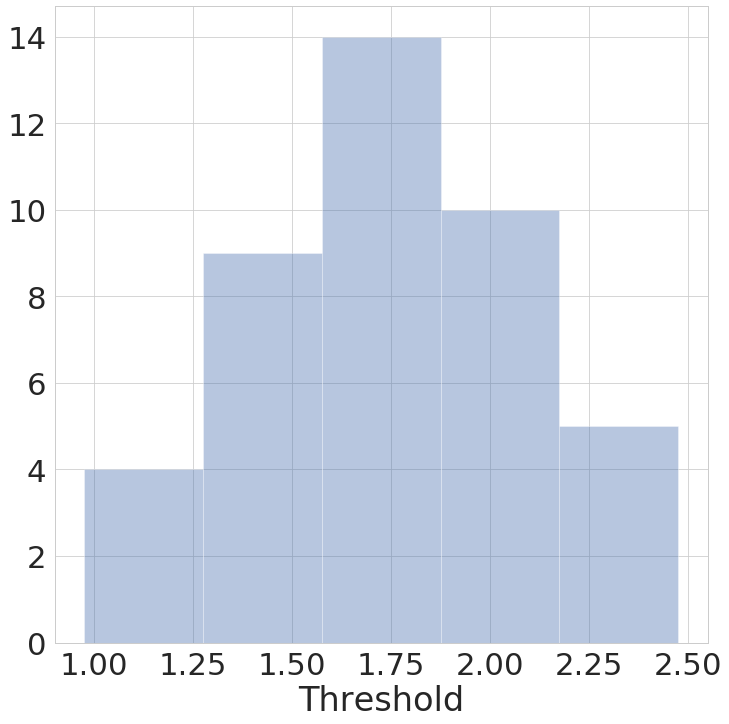

In [4]:
plots.makeHistogramSeaborn(pd_table  = tlist,
                           xname     = 'thres',
                           hue_col   = None,
                           normalize = False,
                           label_name= 'Threshold'
                           )

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


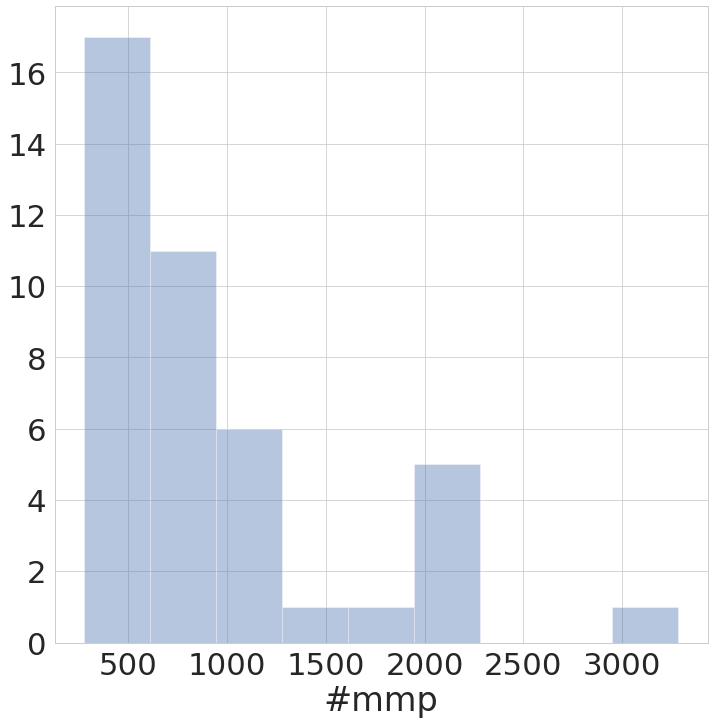

In [5]:
plots.makeHistogramSeaborn(pd_table  = tlist,
                           xname     = '#mmp',
                           hue_col   = None,
                           normalize = False,
                           )

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


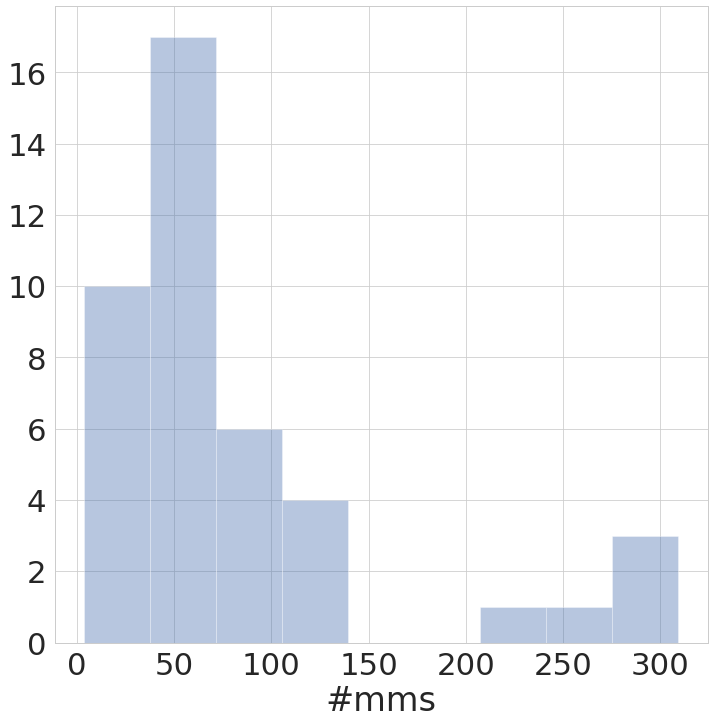

In [6]:
plots.makeHistogramSeaborn(pd_table  = tlist,
                           xname     = '#mms',
                           hue_col   = None,
                           normalize = False,
                           )

In [7]:
def assign_vals(table, cols, new_col):
    for i, c in enumerate(cols):
        new_c = new_col[i]
        table[new_c] = 0
        for tid in table.index:
            data = pd.read_csv('./Dataset/Data/%s.tsv'%tid, sep='\t', index_col=0)
            table.loc[tid, new_c] = data[c].max()

    return table

# Cpdout

In [11]:
type = 'cpdout'

svm     = pd.read_csv('./Score_axv/SVM/mean_%s.tsv'%type, sep='\t', index_col=0)
xgb     = pd.read_csv('./Score_axv/XGBoost/mean_%s.tsv'%type, sep='\t', index_col=0)
rf      = pd.read_csv('./Score_axv/Random_Forest/mean_%s.tsv'%type, sep='\t', index_col=0)
fcn     = pd.read_csv('./Score_axv/FCNN/mean_%s.tsv'%type, sep='\t', index_col=0)
fcn_sep = pd.read_csv('./Score_axv/FCNN_separated/mean_%s.tsv'%type, sep='\t', index_col=0)
#mpn     = pd.read_csv('./Score_axv/MPNN/mean_%s.tsv'%type, sep='\t', index_col=0)
#mpn_sep = pd.read_csv('./Score_axv/MPNN_separated/mean_%s.tsv'%type, sep='\t', index_col=0)
nn1     = pd.read_csv('./Score_axv/1NN/mean_%s.tsv'%type, sep='\t', index_col=0)
nn5     = pd.read_csv('./Score_axv/5NN/mean_%s.tsv'%type, sep='\t', index_col=0)


svm     = assign_vals(svm, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
xgb     = assign_vals(xgb, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
rf      = assign_vals(rf , cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
fcn     = assign_vals(fcn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
fcn_sep = assign_vals(fcn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
#mpn     = assign_vals(mpn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
#mpn_sep = assign_vals(mpn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
nn1     = assign_vals(nn1, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
nn5     = assign_vals(nn5, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])


svm['model']     = 'svm'
xgb['model']     = 'xgb'
rf['model']      = 'rf'
fcn['model']     = 'fcnn'
fcn_sep['model'] = 'fcnn_sep'
#mpn['model']     = 'mpnn'
#mpn_sep['model'] = 'mpnn_sep'
nn1['model']     = '1NN'
nn5['model']     = '5NN'


#all_score = pd.concat([svm, xgb, rf, fcn, fcn_sep, mpn, mpn_sep, nn1, nn5])
all_score = pd.concat([svm, xgb, rf, fcn, fcn_sep, nn1, nn5])

In [12]:
all_score.head()

,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,thres,#MMS,model
CHEMBL1075323,0.936,0.611,0.137,0.224,0.774,0.268,461.333,15.333,0.0,0.009,0.000,0.000,0.010,0.002,7297.333,10.333,1.112321,3.0,svm
CHEMBL1800,0.979,0.900,0.847,0.870,0.954,0.861,243.333,10.333,0.0,0.030,0.004,0.013,0.000,0.016,122.333,0.333,2.065648,33.0,svm
CHEMBL1862,0.914,0.178,0.089,0.112,0.652,0.096,228.333,11.667,0.0,0.028,0.007,0.010,0.013,0.007,162.333,4.333,1.808464,42.0,svm
CHEMBL1902,0.910,0.133,0.056,0.078,0.666,0.045,280.000,11.333,0.0,0.053,0.009,0.018,0.006,0.023,372.000,0.333,1.313816,10.0,svm
CHEMBL2034,0.930,0.375,0.381,0.371,0.807,0.338,327.667,19.000,0.0,0.047,0.063,0.048,0.015,0.047,302.333,12.000,0.998438,57.0,svm


/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/hom

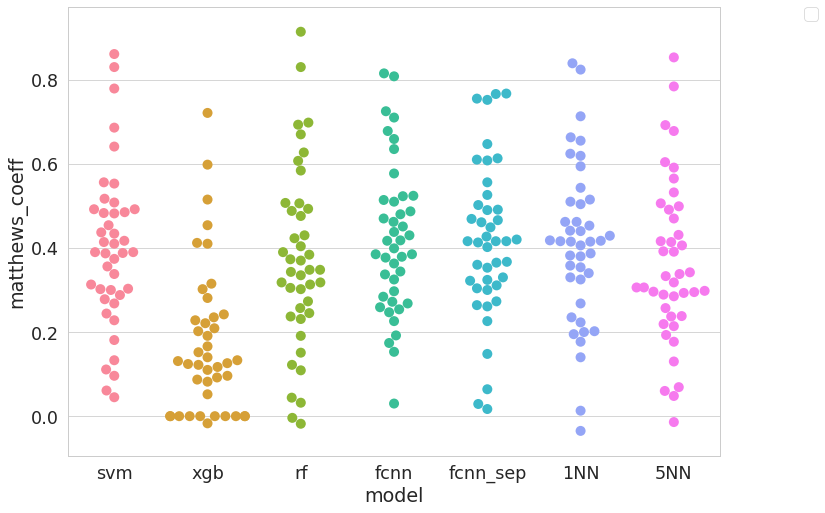

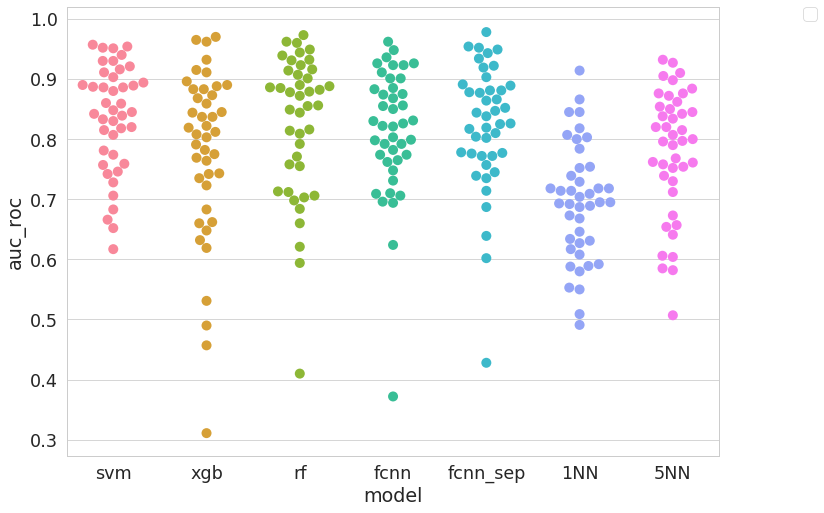

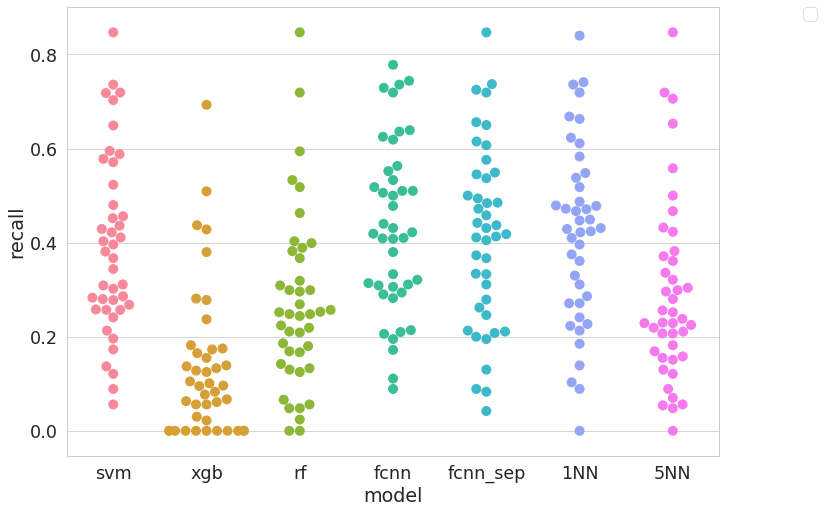

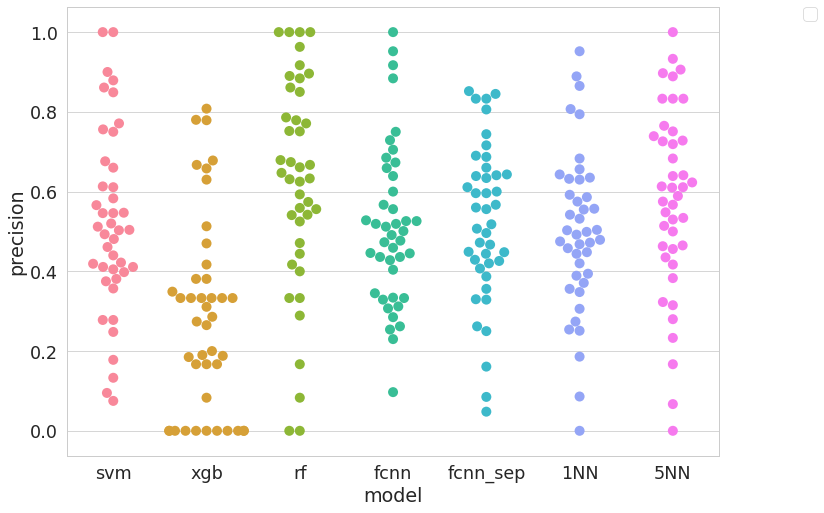

In [14]:
os.makedirs('./Score_axv/swarm_performance_%s/' %(type))

for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    plots.MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            use_swarm = True,
                            )
    plt.savefig('./Score_axv/swarm_performance_%s/swarm_%s.png' %(type, metric))

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


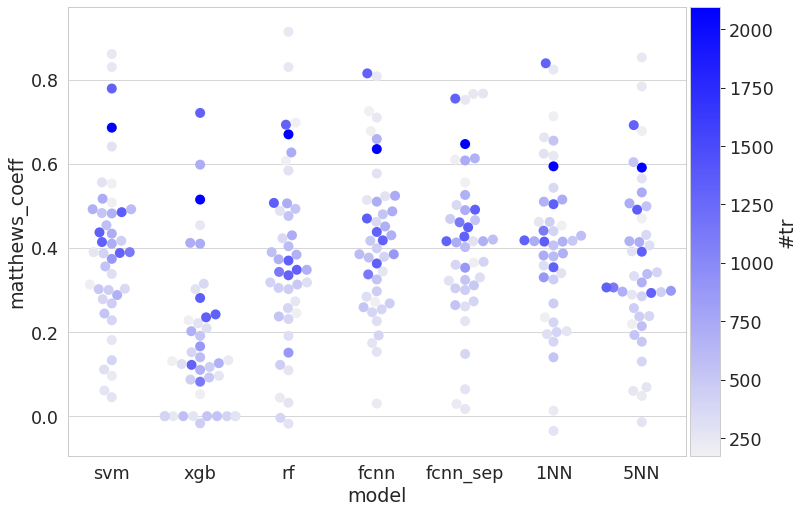

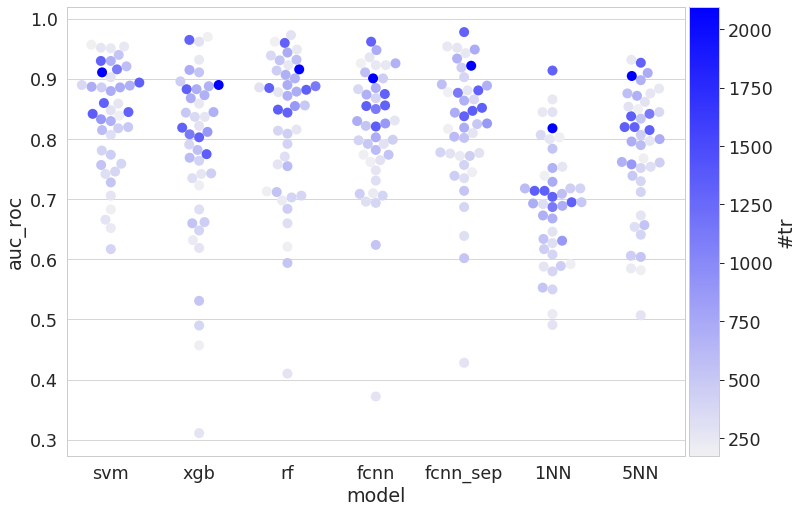

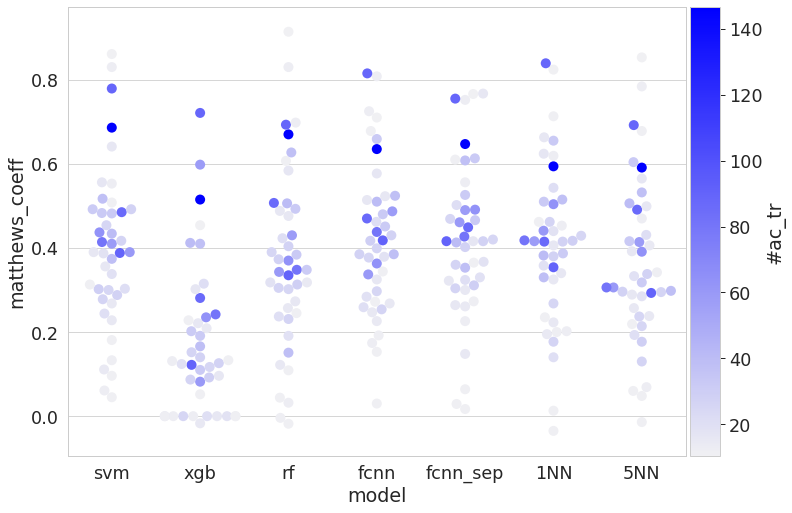

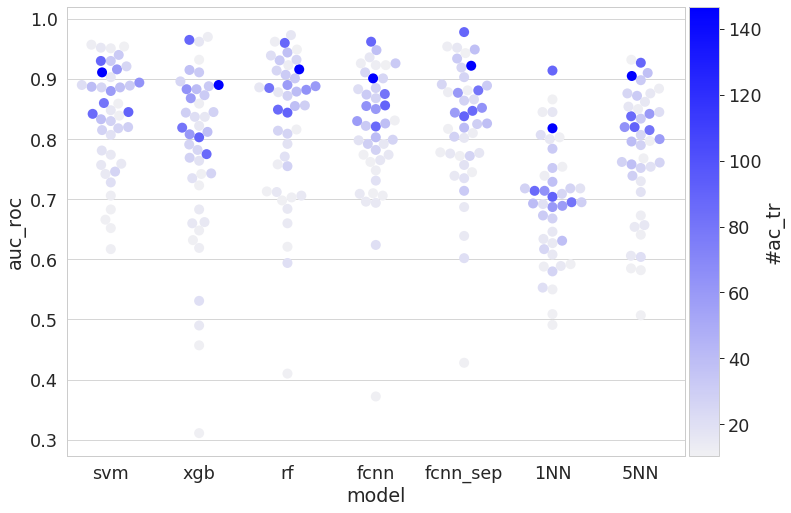

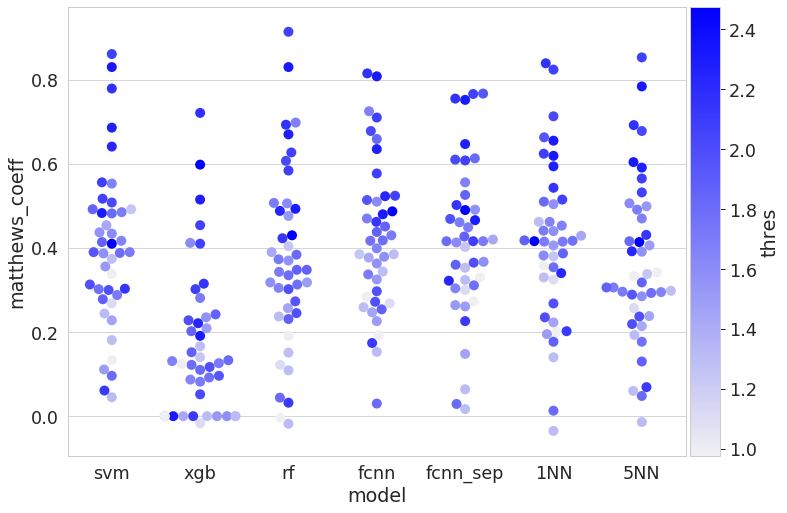

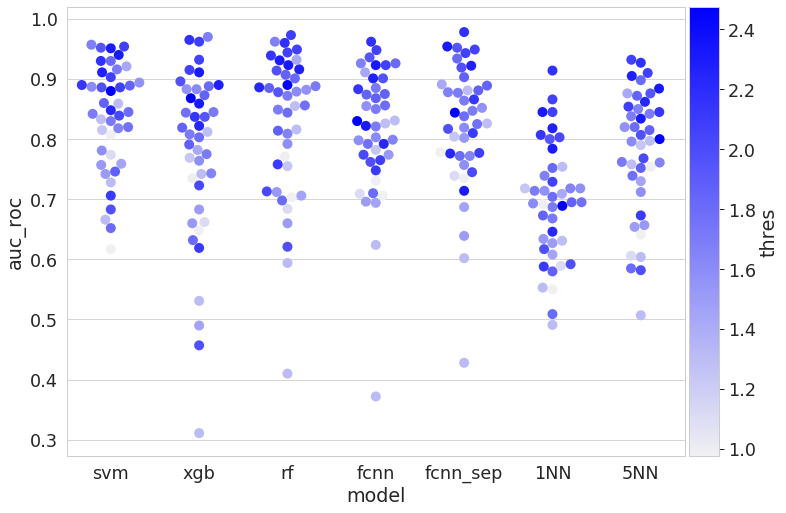

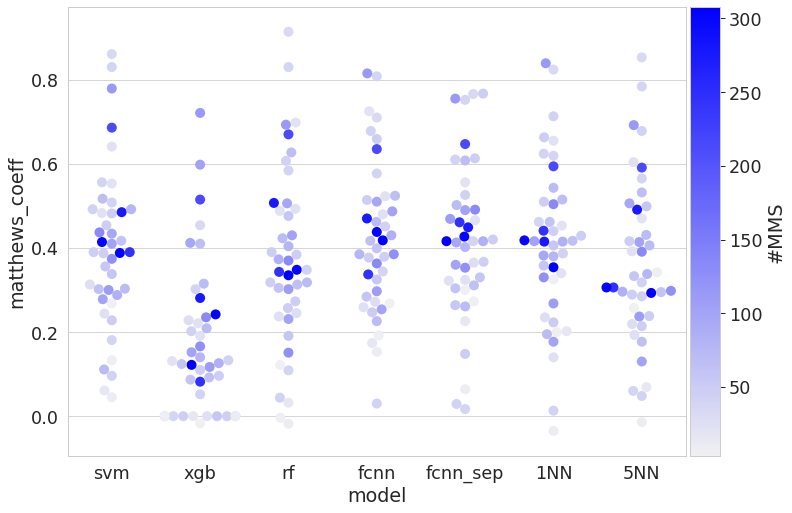

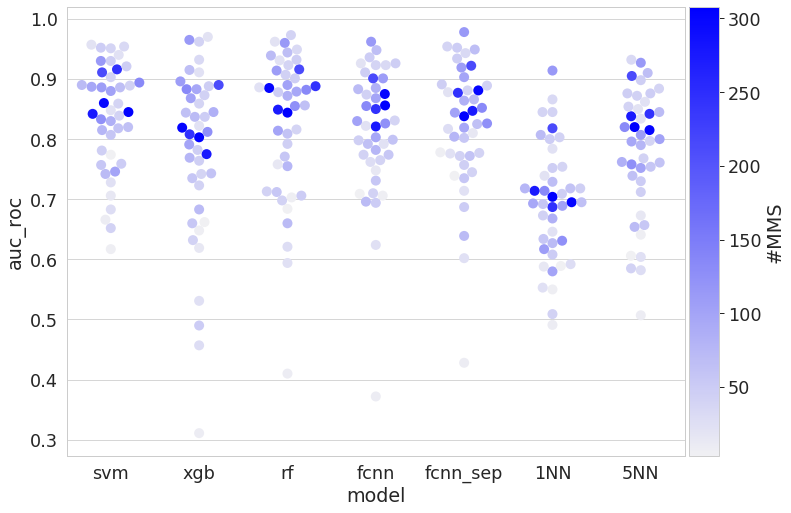

In [15]:
import seaborn as sns
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(11.7, 8.27))

        ax      = sns.swarmplot(x='model', y=metric, hue=color_col, data=all_score, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        plt.savefig('./Score_axv/swarm_performance_%s/swarm_%s_color_%s.png' %(type, metric, color_col))


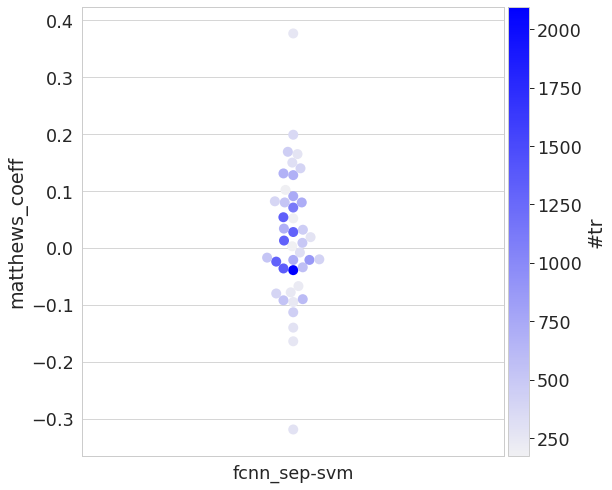

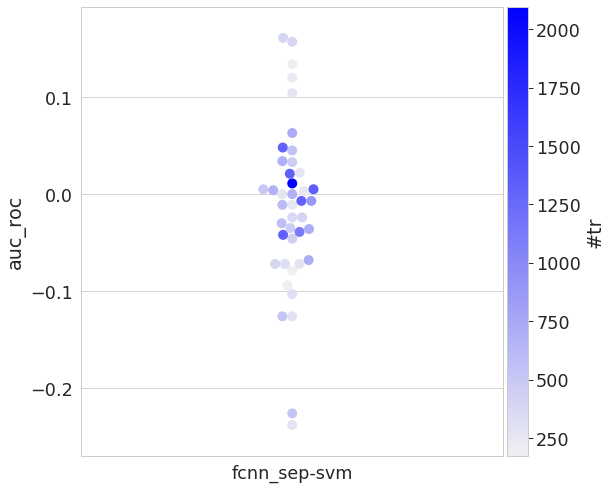

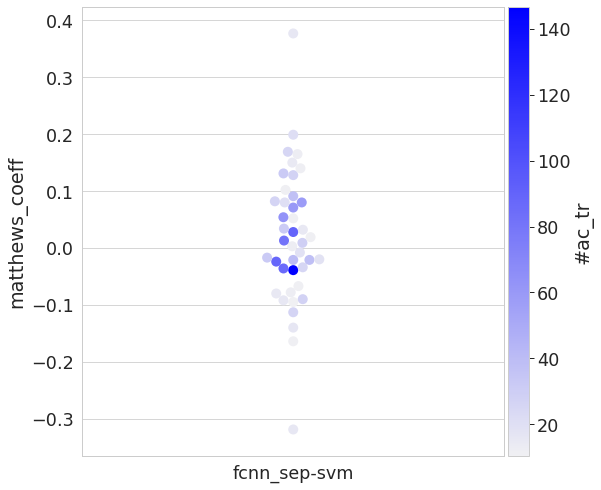

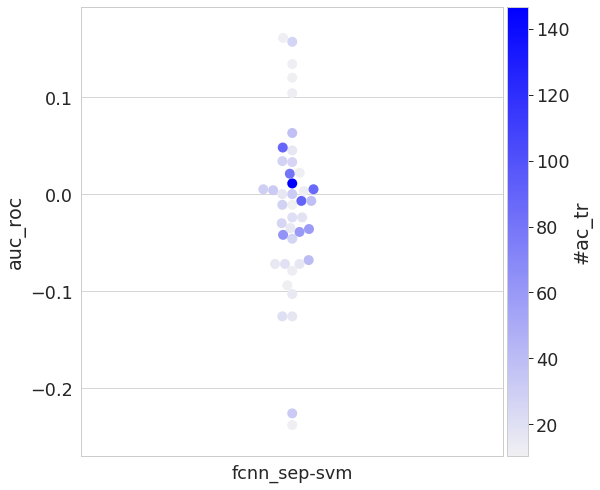

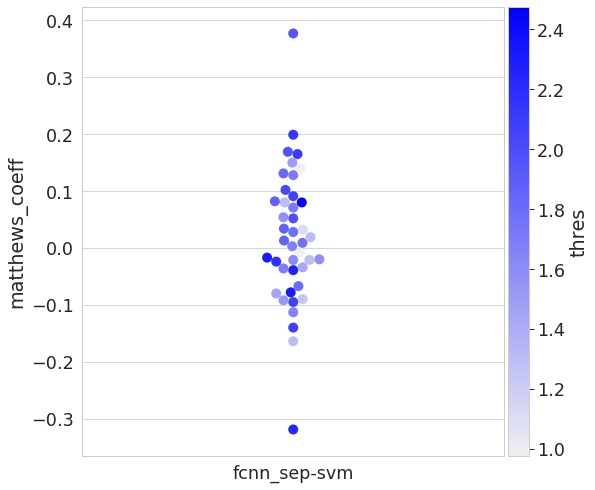

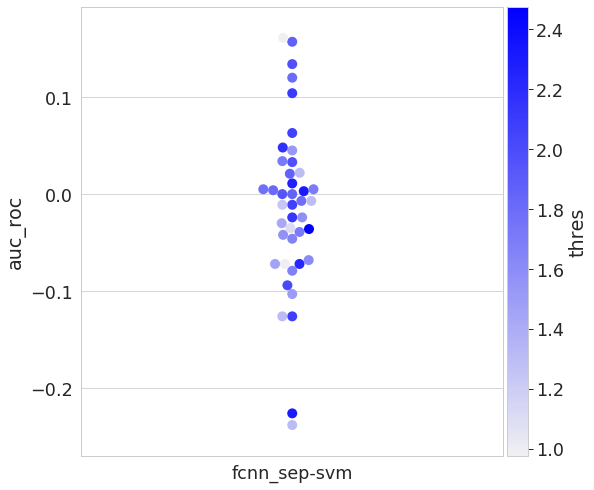

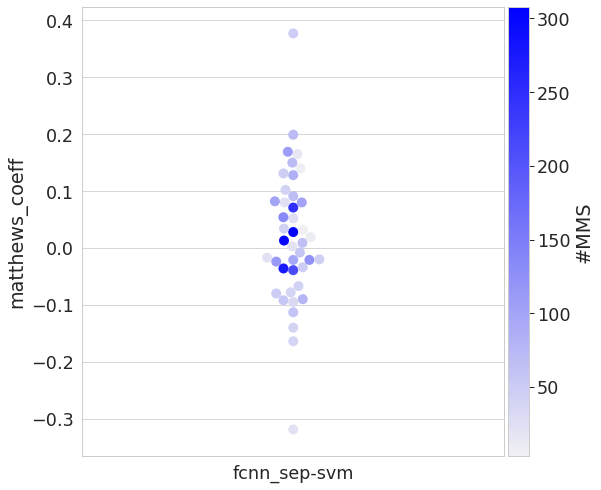

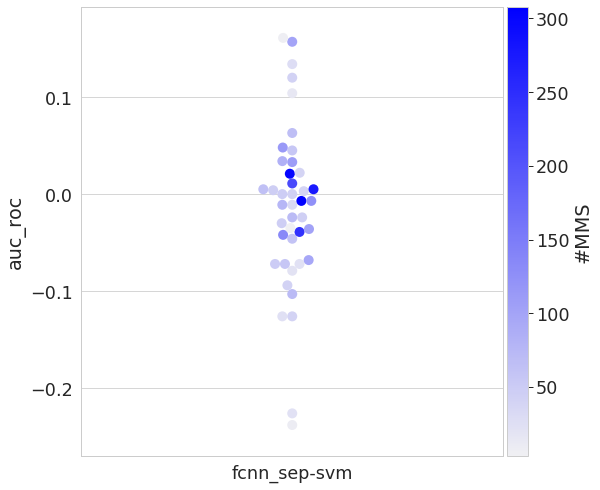

In [16]:
for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        d_fcn_svm = fcn_sep[metric] - svm[metric]
        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(8, 8.27))

        ax      = sns.swarmplot(x=['fcnn_sep-svm']*svm.shape[0], y=d_fcn_svm, hue=fcn[color_col], data=None, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        
        plt.savefig('./Score_axv/swarm_performance_%s/swarm_(fcnn_sep-mpn)_%s_color%s.png' %(type, metric, color_col))

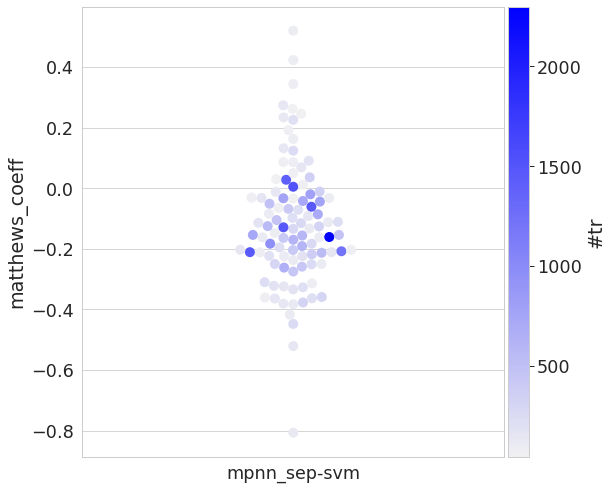

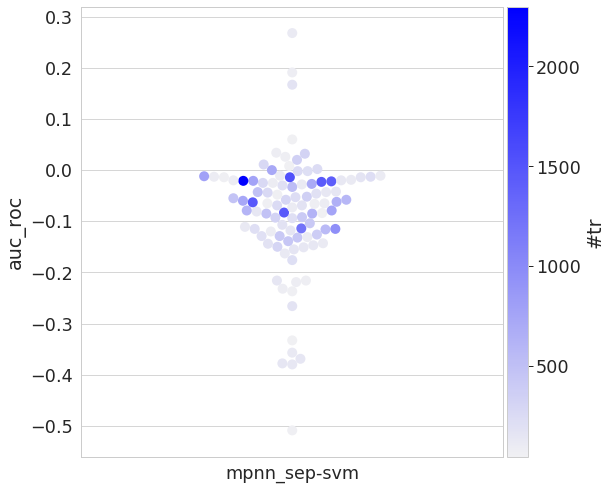

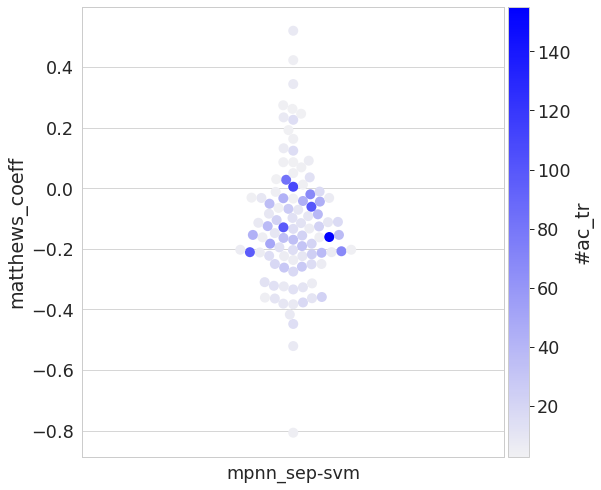

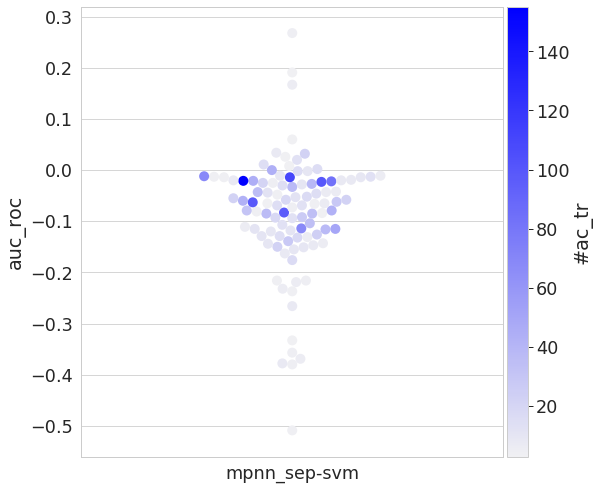

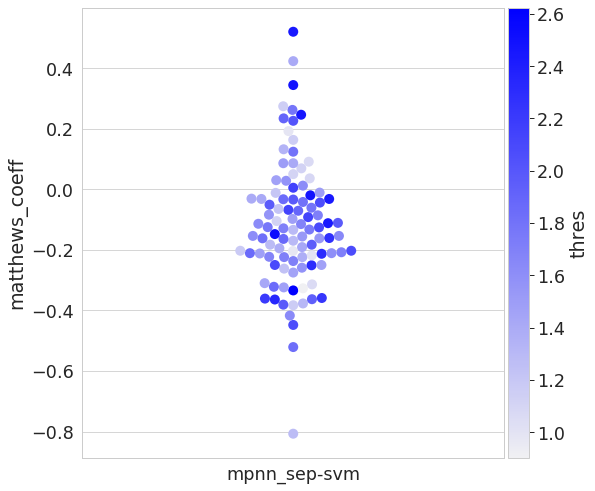

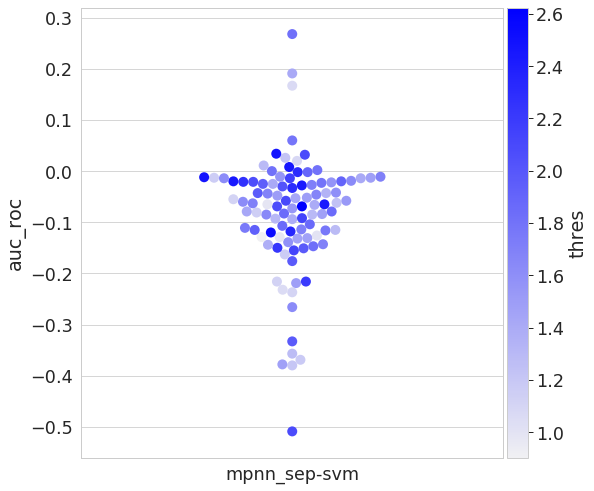

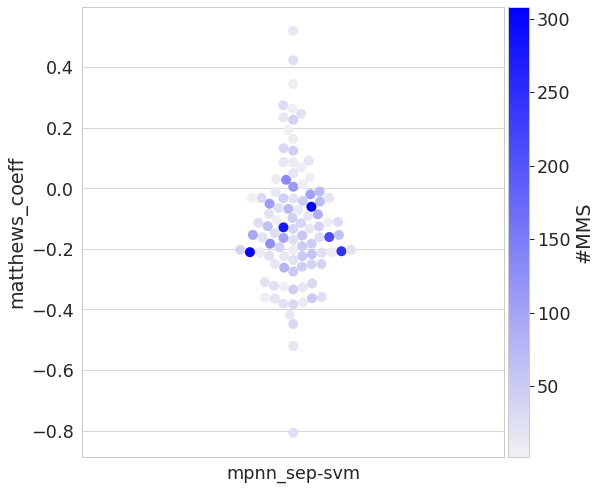

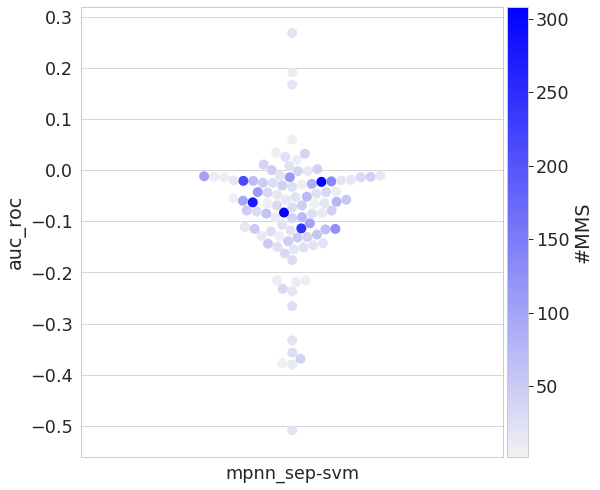

In [20]:
for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        d_mpn_svm = mpn_sep[metric] - svm[metric]
        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(8, 8.27))

        ax      = sns.swarmplot(x=['mpnn_sep-svm']*svm.shape[0], y=d_mpn_svm, hue=fcn[color_col], data=None, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        
        plt.savefig('./Score_axv/swarm_(mpnn_sep-mpn)_%s_color%s.png' %(type, metric, color_col))

In [21]:
import plotly.express as px
import plotly.io as pio


In [22]:
all_score['#tr'] = all_score['#tr'].astype(int)
    
px.strip(data_frame = all_score,
         x          = 'model',
         y          = 'matthews_coeff',
         hover_name = list(all_score.index),
         height     = 300,
         width      = 600,
         #color      = '#tr',
        )

In [24]:
# px.strip(data_frame = None,
#          x          = ['d_fcn-svm']*svm.shape[0],
#          y          = d_mcc_fcn_svm,
#          hover_name = list(svm.index),
#          height     = 600,
#          width      = 600,
#          #color      = '#tr',
#         )

In [78]:
fcn.sort_values('matthews_coeff', ascending=False).head(10)


,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,thres,#MMS,model
CHEMBL4523,0.982,0.826,0.952,0.874,0.997,0.873,258.0,16.0,0.0,0.024,0.007,0.002,0.000,0.002,0.0,0.0,2.312472,39.0,fcnn
CHEMBL204,0.983,0.887,0.872,0.878,0.985,0.870,1525.0,110.0,0.0,0.001,0.002,0.000,0.000,0.000,0.0,0.0,2.164973,114.0,fcnn
CHEMBL5023,0.978,0.933,0.833,0.868,0.918,0.865,105.0,9.0,0.0,0.013,0.021,0.000,0.007,0.000,0.0,0.0,1.563100,19.0,fcnn
CHEMBL237,0.980,0.807,0.877,0.840,0.992,0.831,727.0,44.0,0.0,0.002,0.004,0.002,0.000,0.002,0.0,0.0,1.816195,47.0,fcnn
CHEMBL2147,0.978,0.822,0.852,0.836,0.983,0.825,321.0,22.0,0.0,0.003,0.004,0.003,0.000,0.004,0.0,0.0,2.085949,40.0,fcnn
CHEMBL2954,0.982,0.850,0.800,0.822,0.989,0.814,214.0,11.0,0.0,0.017,0.040,0.028,0.000,0.030,0.0,0.0,1.941869,52.0,fcnn
CHEMBL214,0.973,0.826,0.822,0.821,0.959,0.808,495.0,36.0,0.0,0.039,0.006,0.019,0.001,0.022,0.0,0.0,1.970426,108.0,fcnn
CHEMBL244,0.975,0.821,0.811,0.816,0.962,0.802,2298.0,155.0,0.0,0.004,0.001,0.002,0.000,0.003,0.0,0.0,2.274817,213.0,fcnn
CHEMBL335,0.964,0.749,0.905,0.807,0.976,0.800,194.0,15.0,0.0,0.010,0.027,0.003,0.000,0.004,0.0,0.0,1.677741,22.0,fcnn
CHEMBL255,0.983,0.752,0.778,0.761,0.991,0.754,588.0,22.0,0.0,0.001,0.012,0.002,0.000,0.003,0.0,0.0,1.529897,56.0,fcnn


In [79]:
svm.sort_values('matthews_coeff', ascending=False).head(10)

,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,thres,#MMS,model
CHEMBL333,1.000,1.000,1.000,1.000,1.000,1.000,100.0,6.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,1.706309,13.0,svm
CHEMBL4523,0.994,1.000,0.905,0.949,0.999,0.948,258.0,16.0,0.000,0.000,0.007,0.002,0.000,0.002,0.0,0.0,2.312472,39.0,svm
CHEMBL1800,0.991,0.952,0.905,0.927,0.953,0.923,252.0,15.0,0.000,0.007,0.007,0.005,0.002,0.006,0.0,0.0,2.065648,33.0,svm
CHEMBL5407,0.984,1.000,0.833,0.889,1.000,0.897,99.0,10.0,0.001,0.000,0.083,0.037,0.000,0.032,0.0,0.0,2.530372,25.0,svm
CHEMBL2954,0.989,1.000,0.800,0.880,0.995,0.885,214.0,11.0,0.000,0.000,0.040,0.016,0.000,0.014,0.0,0.0,1.941869,52.0,svm
CHEMBL3991,0.983,0.896,0.882,0.882,0.991,0.877,542.0,38.0,0.000,0.010,0.010,0.001,0.000,0.001,0.0,0.0,2.308713,23.0,svm
CHEMBL2820,0.982,0.926,0.833,0.877,0.950,0.869,305.0,22.0,0.000,0.016,0.013,0.015,0.008,0.017,0.0,0.0,2.237137,23.0,svm
CHEMBL1926488,0.980,0.750,1.000,0.857,0.979,0.857,116.0,8.0,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,1.642119,15.0,svm
CHEMBL204,0.979,0.817,0.915,0.862,0.987,0.853,1525.0,110.0,0.000,0.000,0.006,0.001,0.000,0.002,0.0,0.0,2.164973,114.0,svm
CHEMBL3729,0.980,1.000,0.741,0.847,0.996,0.850,273.0,21.0,0.000,0.000,0.016,0.007,0.000,0.006,0.0,0.0,1.947427,49.0,svm


In [80]:
mpn.sort_values('matthews_coeff', ascending=False).head(10)

,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,thres,#MMS,model
CHEMBL333,0.977,0.783,1.000,0.869,1.000,0.870,100.0,6.0,0.001,0.041,0.000,0.016,0.000,0.015,0.0,0.0,1.706309,13.0,mpnn
CHEMBL204,0.948,0.590,0.922,0.718,0.970,0.713,1525.0,110.0,0.000,0.002,0.006,0.002,0.001,0.003,0.0,0.0,2.164973,114.0,mpnn
CHEMBL2147,0.940,0.533,0.926,0.672,0.991,0.674,321.0,22.0,0.000,0.007,0.004,0.003,0.000,0.002,0.0,0.0,2.085949,40.0,mpnn
CHEMBL4072,0.908,0.472,0.778,0.563,0.970,0.553,200.0,15.0,0.003,0.035,0.009,0.014,0.000,0.011,0.0,0.0,2.020320,42.0,mpnn
CHEMBL5407,0.837,0.372,1.000,0.540,0.974,0.552,99.0,10.0,0.002,0.005,0.000,0.005,0.002,0.005,0.0,0.0,2.530372,25.0,mpnn
CHEMBL244,0.905,0.402,0.776,0.529,0.926,0.515,2298.0,155.0,0.000,0.003,0.001,0.003,0.000,0.003,0.0,0.0,2.274817,213.0,mpnn
CHEMBL236,0.890,0.321,0.870,0.468,0.909,0.487,765.0,43.0,0.000,0.001,0.001,0.002,0.001,0.001,0.0,0.0,1.854182,43.0,mpnn
CHEMBL344,0.835,0.326,0.854,0.465,0.883,0.461,480.0,37.0,0.006,0.009,0.001,0.011,0.001,0.009,0.0,0.0,1.654900,61.0,mpnn
CHEMBL237,0.848,0.278,0.930,0.428,0.937,0.459,727.0,44.0,0.000,0.001,0.006,0.001,0.000,0.002,0.0,0.0,1.816195,47.0,mpnn
CHEMBL251,0.876,0.300,0.804,0.435,0.906,0.442,707.0,39.0,0.003,0.016,0.060,0.029,0.006,0.042,0.0,0.0,1.715372,85.0,mpnn


In [82]:
diff_fcnn_svm = fcn.copy()
diff_fcnn_svm['d_mcc'] = fcn['matthews_coeff'] - svm['matthews_coeff']
diff_fcnn_svm.sort_values('d_mcc', ascending=False).head(10)

,accuracy,precision,recall,f1,auc_roc,matthews_coeff,#tr,#ac_tr,accuracy_var,precision_var,recall_var,f1_var,auc_roc_var,matthews_coeff_var,#tr_var,#ac_tr_var,thres,#MMS,model,d_mcc
CHEMBL262,0.889,0.444,0.333,0.356,0.667,0.316,47.0,3.000,0.003,0.259,0.083,0.113,0.001,0.145,0.0,0.000,2.467453,21.0,fcnn,0.316
CHEMBL4361,0.914,0.194,0.500,0.267,0.774,0.273,63.0,3.667,0.002,0.030,0.250,0.053,0.095,0.060,0.0,0.333,1.111083,17.0,fcnn,0.273
CHEMBL216,0.651,0.238,0.667,0.296,0.919,0.257,98.0,4.000,0.275,0.139,0.333,0.192,0.014,0.226,0.0,0.000,1.162404,8.0,fcnn,0.268
CHEMBL1862,0.835,0.271,0.905,0.417,0.917,0.440,248.0,16.000,0.000,0.000,0.007,0.001,0.001,0.002,0.0,0.000,1.808464,42.0,fcnn,0.257
CHEMBL3837,0.963,0.666,0.702,0.683,0.974,0.664,771.0,45.000,0.000,0.001,0.004,0.002,0.000,0.002,0.0,0.000,2.066095,68.0,fcnn,0.249
CHEMBL3018,0.683,0.699,0.833,0.615,1.000,0.563,94.0,8.000,0.258,0.271,0.083,0.171,0.000,0.262,0.0,0.000,2.453831,15.0,fcnn,0.230
CHEMBL203,0.937,0.111,0.333,0.167,0.483,0.183,48.0,3.000,0.001,0.037,0.333,0.083,0.186,0.100,0.0,0.000,1.471663,11.0,fcnn,0.213
CHEMBL3473,0.944,0.333,0.333,0.324,0.916,0.302,140.0,7.000,0.000,0.083,0.111,0.086,0.003,0.090,0.0,0.000,1.344721,34.0,fcnn,0.213
CHEMBL1946,0.951,0.111,0.333,0.167,0.936,0.185,61.0,3.000,0.000,0.037,0.333,0.083,0.003,0.103,0.0,0.000,0.990743,6.0,fcnn,0.208
CHEMBL229,0.972,0.750,0.467,0.567,0.842,0.575,273.0,12.000,0.000,0.062,0.053,0.061,0.008,0.060,0.0,0.000,1.688819,35.0,fcnn,0.189


In [1]:
diff_fcnn_svm.sort_values('d_mcc', ascending=True).head(10)

NameError: name 'diff_fcnn_svm' is not defined

In [192]:
def makeHistogramOne(y1, xlab_name='Value', legend1='Data 1', y_title='', is_scale=False, save_fig_name=None, show_legend=True, rotate_x=0, logscale=False, include_zero=True):
    """
    Make one histograms and then save it on the file if specified
    """
    plt.figure()

    if logscale:
        y1 = np.log10(y1)
        xlab_name += '(log10)' 
        
    if include_zero:
        bins = [0.1*i for i in range(0, 11)]
        plt.xlim([0, 1.0])
    else:
        bins = [0.1*i for i in range(1, 11)]
        plt.xlim([0.1, 1.0])
        
    h1 = plt.hist(y1, bins=bins, color='b', label=legend1, density=is_scale)

    plt.xlabel(xlab_name, fontsize=18)
    plt.ylabel('Frequency', fontsize=18)
    plt.title(y_title)
    plt.xticks(fontsize=18, rotation=rotate_x)
    plt.yticks(fontsize=18)
    
    
    if show_legend:
        plt.legend(loc='upper right', fontsize=18)
    if save_fig_name is not None:
        plt.savefig(save_fig_name, bbox_inches='tight')
        plt.close()
    else:
        plt.show()
    return h1


from Fingerprint.Hash2BitManager       import Hash2Bits, FindBitLength, GenerateFpsArray
from Kernels.Kernel          import funcTanimotoKernel_MMPKernel, funcTanimotoSklearn
from functools import partial
from Similarity.SimilarityHist import flattenTC
import seaborn as sns
import os

def MakeSimilarityHistogram(target, folder, use_zero=True):
    df_tlist = pd.read_csv('./Dataset/target_list.tsv', sep='\t', index_col='chembl_tid') 
    df_main = pd.read_csv('./Dataset/Data/%s.tsv'%target, sep='\t', index_col=0)
    df_ecfp = pd.read_csv('./Dataset/ECFP/%s.tsv'%target, sep='\t', index_col=0)

    len_c = FindBitLength(df_ecfp, ['core'])
    len_s = FindBitLength(df_ecfp, ['sub1', 'sub2', 'overlap'])

    mms = df_ecfp.loc[df_main.drop_duplicates(['core_id']).index,:]

    fpgen = Hash2Bits()
    fpc = GenerateFpsArray(mms['core'], nbits=len_c) 
    fp = fpgen.GetMMPfingerprints_DF_unfold(df_ecfp, ['core', 'sub1', 'sub2', 'overlap'], nbits=[len_c, len_s], overlap='concat')

    matc = funcTanimotoSklearn(fpc,fpc)
    simc = flattenTC(matc)

    simfunc = partial(funcTanimotoKernel_MMPKernel, len_c=len_c)
    mat = simfunc(fp,fp)
    sim = flattenTC(mat)

    tname = df_tlist.loc[target, 'primary_name']
    
    if use_zero:
        outdir = './Score_wodirection_trtssplit/similarity_hist/%s-with_zero' %(folder)
    else:
        outdir = './Score_wodirection_trtssplit/similarity_hist/%s-without_zero' %(folder)
        
    os.makedirs(outdir, exist_ok=True)
    
    makeHistogramOne(simc,
                     xlab_name     = 'core_wise_similarity',
                     y_title       = tname,
                     show_legend   = False,
                     save_fig_name = '%s/core_wise_%s.png'%(outdir, target),
                     include_zero  = use_zero,)
    
    makeHistogramOne(sim,
                     xlab_name     = 'mmp_wise_similarity',
                     y_title       = tname,
                     show_legend   = False,
                     save_fig_name = '%s/mmp_wise_%s.png'%(outdir, target),
                     include_zero  = use_zero,)
    

In [193]:
# fcntargets = diff_fcnn_svm.sort_values('d_mcc', ascending=False).index[:10]
# svmtargets = diff_fcnn_svm.sort_values('d_mcc', ascending=True).index[:10]

# for use_zero in [True, False]:
#     for target in fcntargets:   
#         MakeSimilarityHistogram(target, 'fcnn-svm/fcnn_better', use_zero=use_zero)
        
#     for target in svmtargets:
#         MakeSimilarityHistogram(target, 'fcnn-svm/svm_better', use_zero=use_zero)

/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


/home/tamuras0/PYTHON_LIBRARY/myfuncs/Fingerprint/Hash2BitManager.py:208: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



    $ Overlap option is selected as concat


In [2]:
def VisualizeSimilarCpd(target, folder, use_zero=True):
    df_tlist = pd.read_csv('./Dataset/target_list.tsv', sep='\t', index_col='chembl_tid') 
    df_main = pd.read_csv('./Dataset/Data/%s.tsv'%target, sep='\t', index_col=0)
    df_ecfp = pd.read_csv('./Dataset/ECFP/%s.tsv'%target, sep='\t', index_col=0)
    log     = pd.read_csv('./Log_wodirection_trtssplit/SVM/%s_trial0.tsv'%target, sep='\t', index_col=0)

    len_c = FindBitLength(df_ecfp, ['core'])
    len_s = FindBitLength(df_ecfp, ['sub1', 'sub2', 'overlap'])

    mms = df_ecfp.loc[df_main.drop_duplicates(['core_id']).index,:]

    fpgen = Hash2Bits()
    fpc = GenerateFpsArray(mms['core'], nbits=len_c) 
    fp = fpgen.GetMMPfingerprints_DF_unfold(df_ecfp, ['core', 'sub1', 'sub2', 'overlap'], nbits=[len_c, len_s], overlap='concat')

    matc = funcTanimotoSklearn(fpc,fpc)
    simc = flattenTC(matc)

    simfunc = partial(funcTanimotoKernel_MMPKernel, len_c=len_c)
    mat = simfunc(fp,fp)
    sim = flattenTC(mat)

    tname = df_tlist.loc[target, 'primary_name']
    
    if use_zero:
        outdir = './Score_wodirection_trtssplit/similarity_hist/%s-with_zero' %(folder)
    else:
        outdir = './Score_wodirection_trtssplit/similarity_hist/%s-without_zero' %(folder)
        
    os.makedirs(outdir, exist_ok=True)
    
    makeHistogramOne(simc,
                     xlab_name     = 'core_wise_similarity',
                     y_title       = tname,
                     show_legend   = False,
                     save_fig_name = '%s/core_wise_%s.png'%(outdir, target),
                     include_zero  = use_zero,)
    
    makeHistogramOne(sim,
                     xlab_name     = 'mmp_wise_similarity',
                     y_title       = tname,
                     show_legend   = False,
                     save_fig_name = '%s/mmp_wise_%s.png'%(outdir, target),
                     include_zero  = use_zero,)

# Bothout

In [17]:
type = 'bothout'

svm     = pd.read_csv('./Score_axv/SVM/mean_%s.tsv'%type, sep='\t', index_col=0)
xgb     = pd.read_csv('./Score_axv/XGBoost/mean_%s.tsv'%type, sep='\t', index_col=0)
rf      = pd.read_csv('./Score_axv/Random_Forest/mean_%s.tsv'%type, sep='\t', index_col=0)
fcn     = pd.read_csv('./Score_axv/FCNN/mean_%s.tsv'%type, sep='\t', index_col=0)
fcn_sep = pd.read_csv('./Score_axv/FCNN_separated/mean_%s.tsv'%type, sep='\t', index_col=0)
#mpn     = pd.read_csv('./Score_axv/MPNN/mean_%s.tsv'%type, sep='\t', index_col=0)
#mpn_sep = pd.read_csv('./Score_axv/MPNN_separated/mean_%s.tsv'%type, sep='\t', index_col=0)
nn1     = pd.read_csv('./Score_axv/1NN/mean_%s.tsv'%type, sep='\t', index_col=0)
nn5     = pd.read_csv('./Score_axv/5NN/mean_%s.tsv'%type, sep='\t', index_col=0)


svm     = assign_vals(svm, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
xgb     = assign_vals(xgb, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
rf      = assign_vals(rf , cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
fcn     = assign_vals(fcn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
fcn_sep = assign_vals(fcn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
#mpn     = assign_vals(mpn, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
#mpn_sep = assign_vals(mpn_sep, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
nn1     = assign_vals(nn1, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])
nn5     = assign_vals(nn5, cols=['thres', 'core_id'], new_col=['thres', '#MMS'])


svm['model']     = 'svm'
xgb['model']     = 'xgb'
rf['model']      = 'rf'
fcn['model']     = 'fcnn'
fcn_sep['model'] = 'fcnn_sep'
#mpn['model']     = 'mpnn'
#mpn_sep['model'] = 'mpnn_sep'
nn1['model']     = '1NN'
nn5['model']     = '5NN'


#all_score = pd.concat([svm, xgb, rf, fcn, fcn_sep, mpn, mpn_sep, nn1, nn5])
all_score = pd.concat([svm, xgb, rf, fcn, fcn_sep, nn1, nn5])

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/utils.py:189: FutureWarning: This function is deprecated and will be removed in a future version
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
/home/tamu

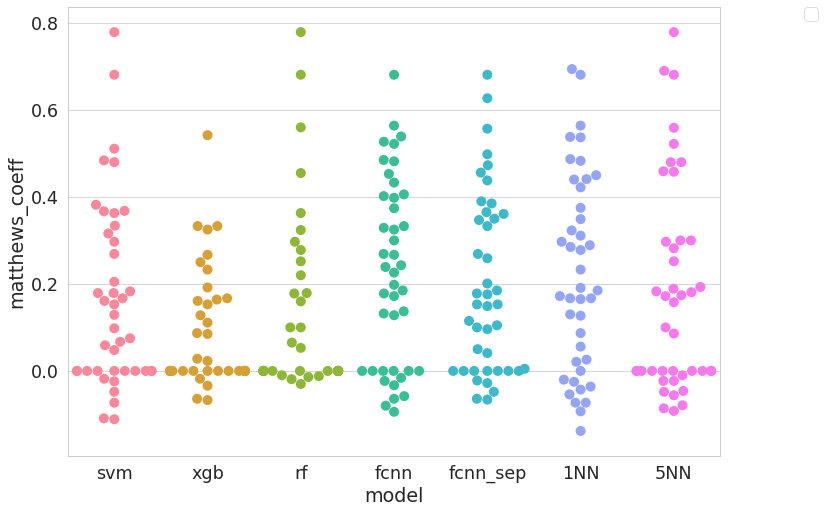

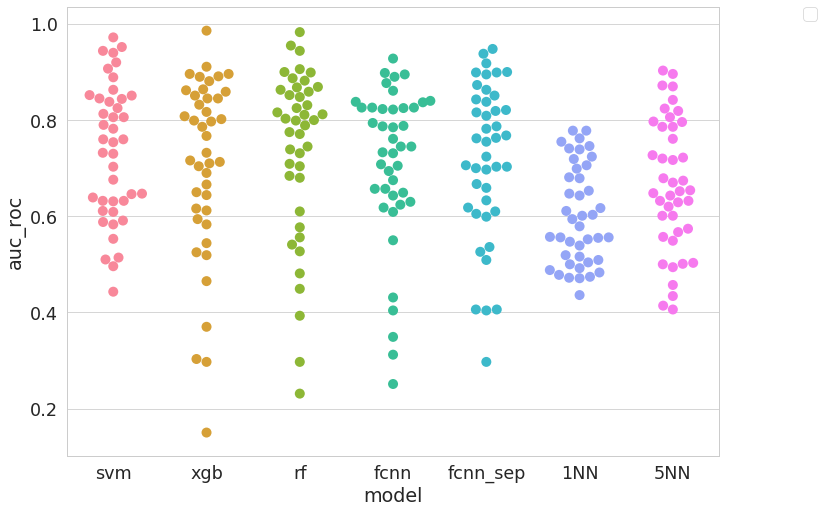

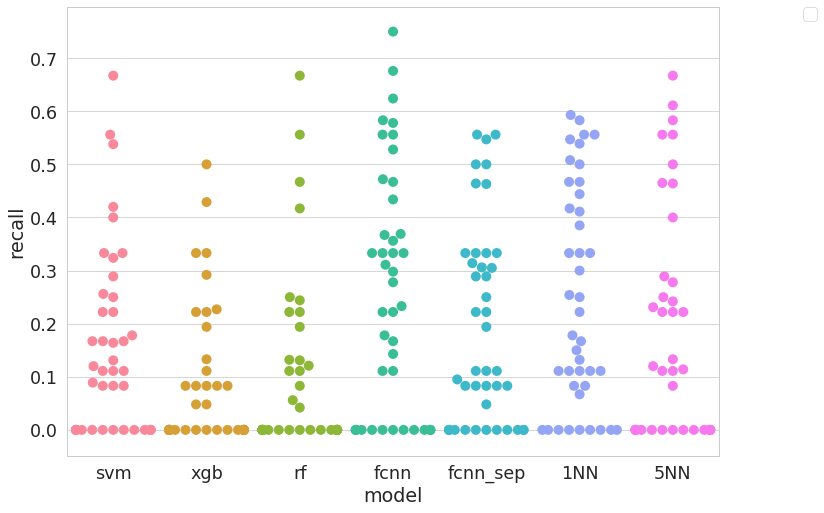

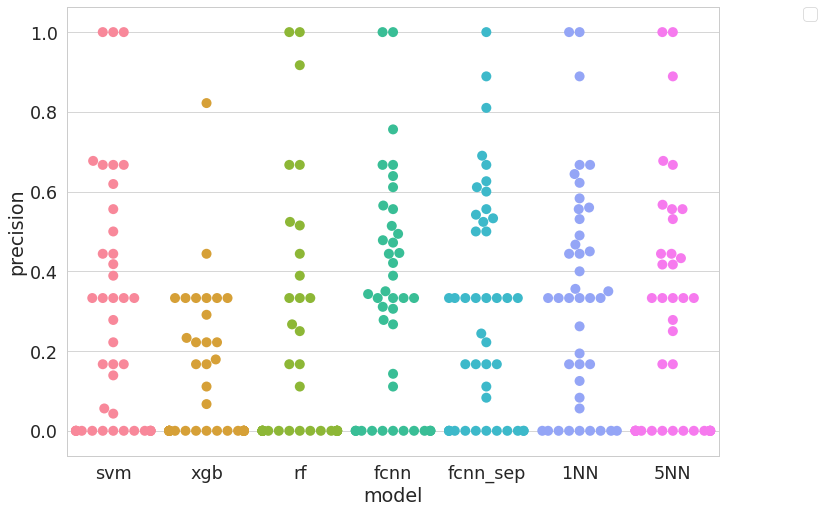

In [18]:
os.makedirs('./Score_axv/swarm_performance_%s/' %(type))

for metric in ['matthews_coeff', 'auc_roc', 'recall', 'precision']:
    plots.MakeBoxPlotsSeaborn(table     = all_score,
                            xname     = 'model',
                            yname     = metric,
                            use_swarm = True,
                            )
    plt.savefig('./Score_axv/swarm_performance_%s/swarm_%s.png' %(type, metric))

/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/miniconda3/envs/rdkit/lib/python3.6/site-packages/seaborn/categorical.py:1296: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/tamuras0/min

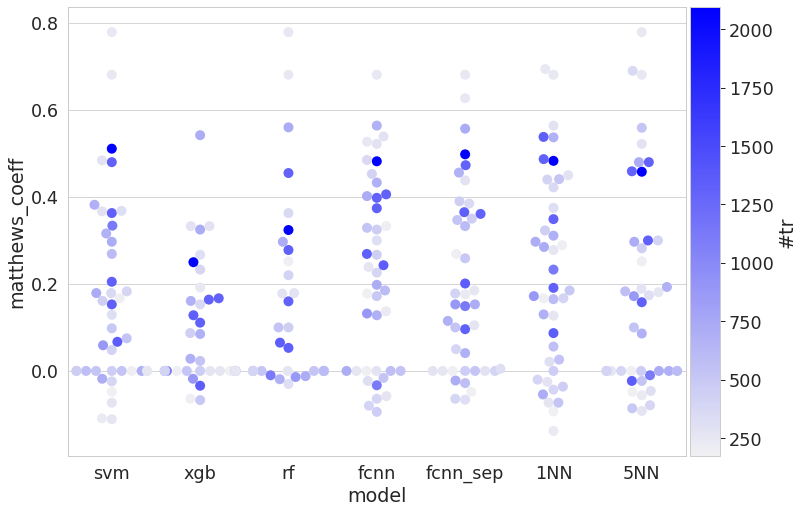

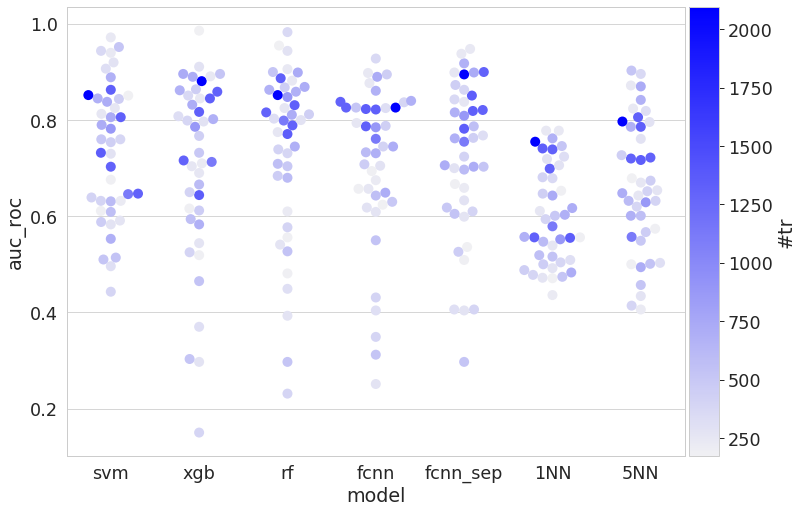

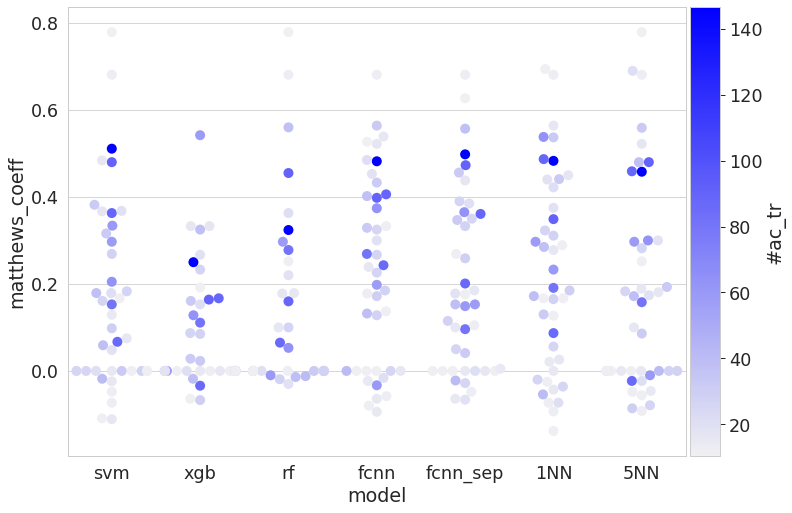

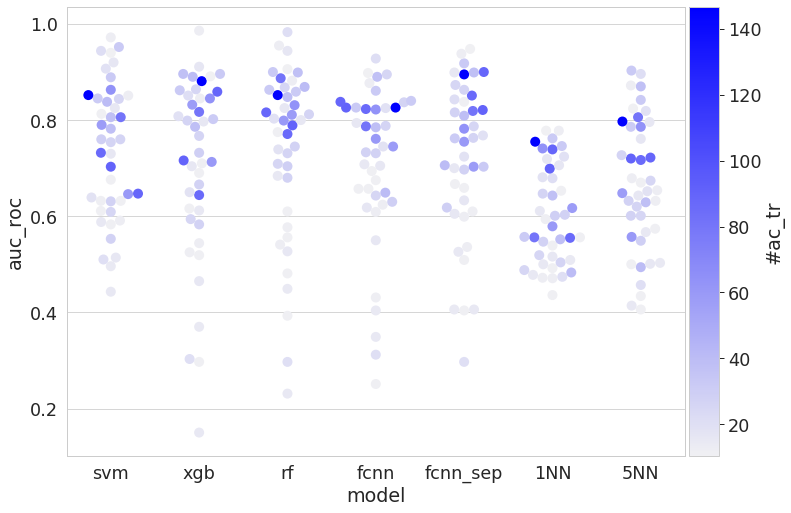

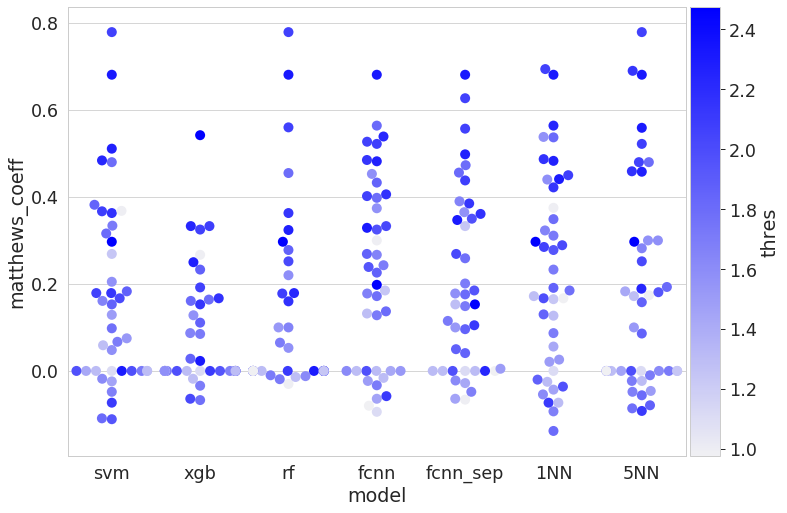

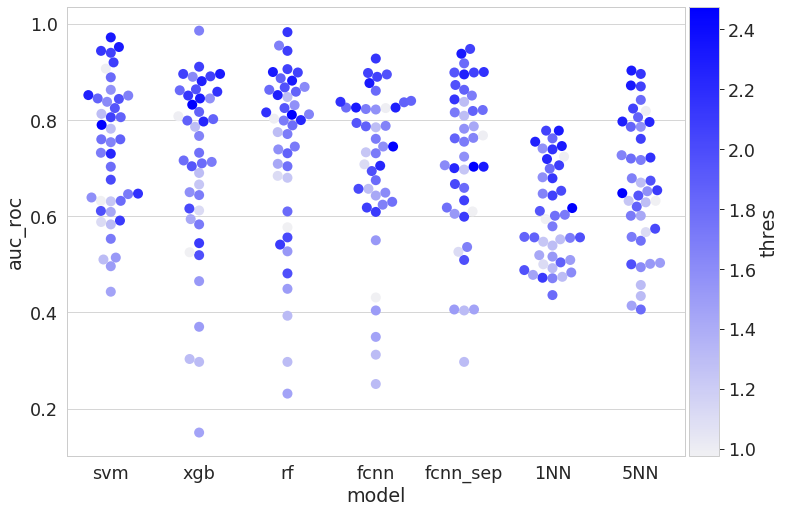

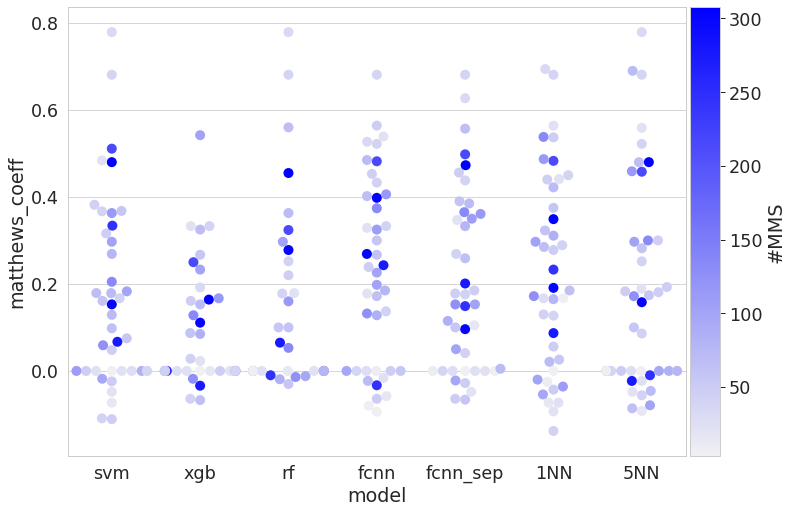

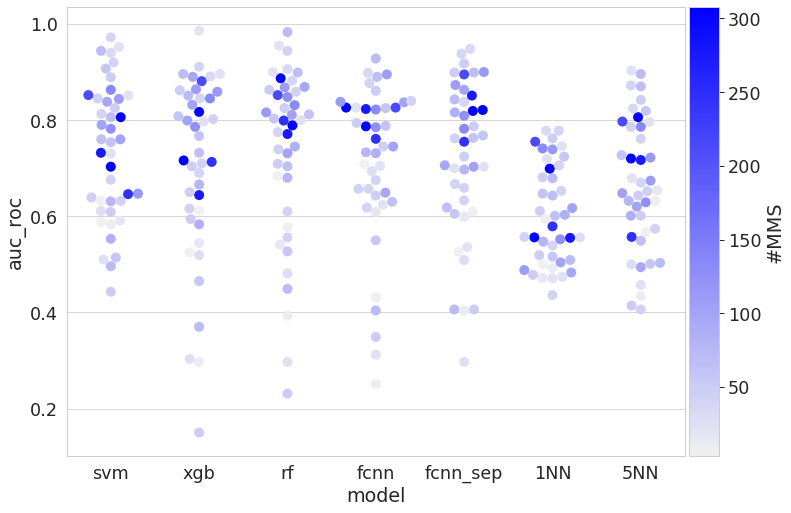

In [19]:
import seaborn as sns
import matplotlib
from mpl_toolkits.axes_grid1 import make_axes_locatable

for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(11.7, 8.27))

        ax      = sns.swarmplot(x='model', y=metric, hue=color_col, data=all_score, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        plt.savefig('./Score_axv/swarm_performance_%s/swarm_%s_color_%s.png' %(type, metric, color_col))


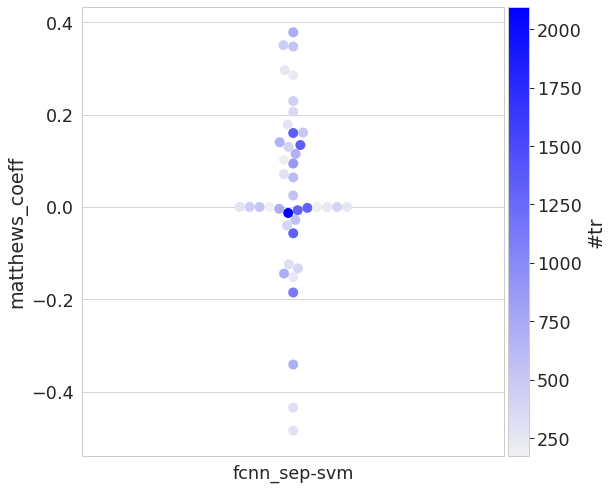

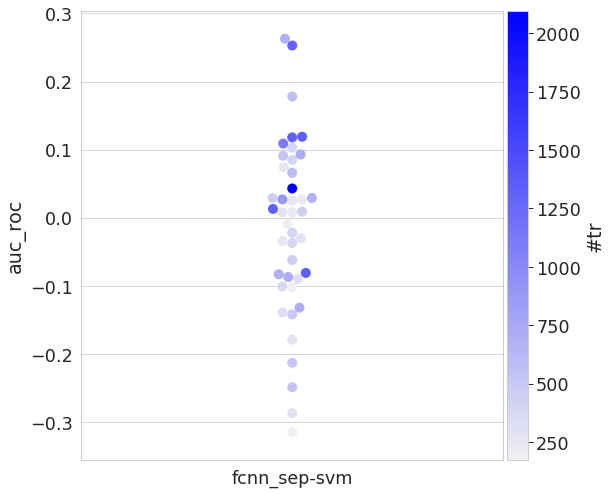

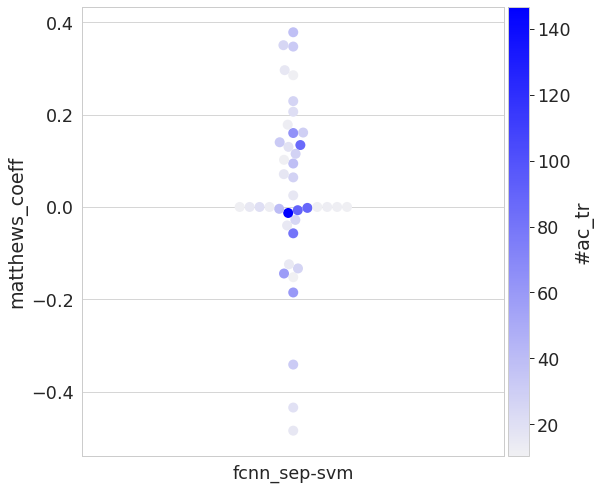

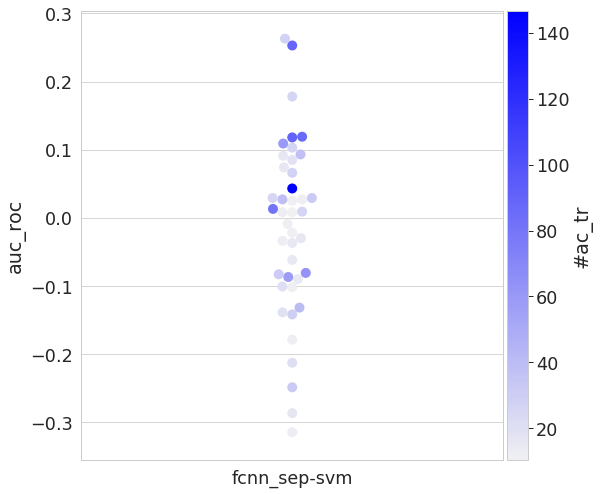

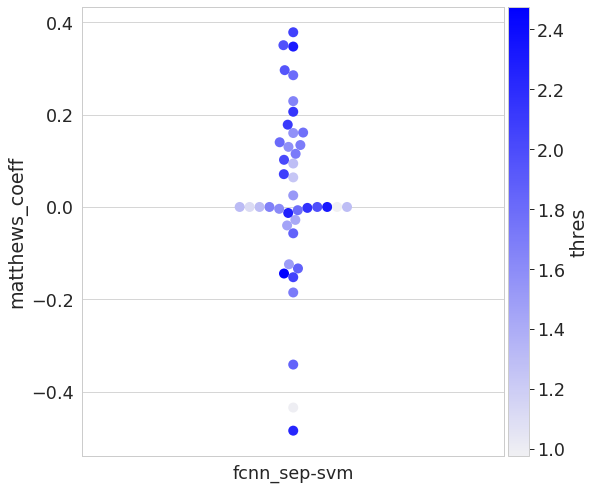

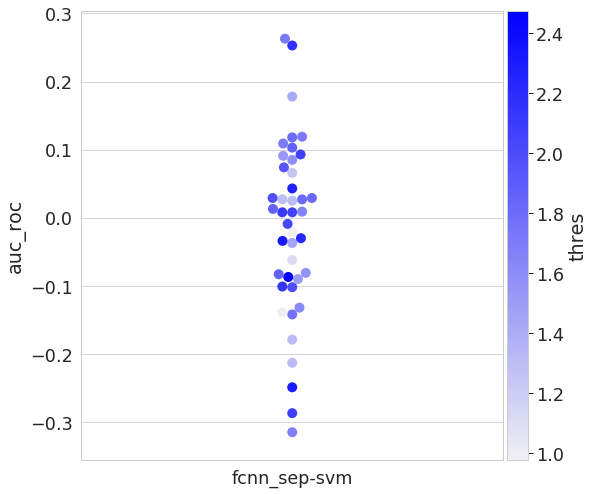

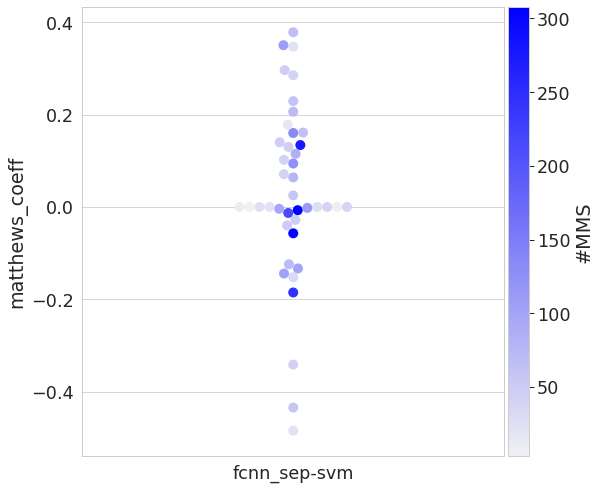

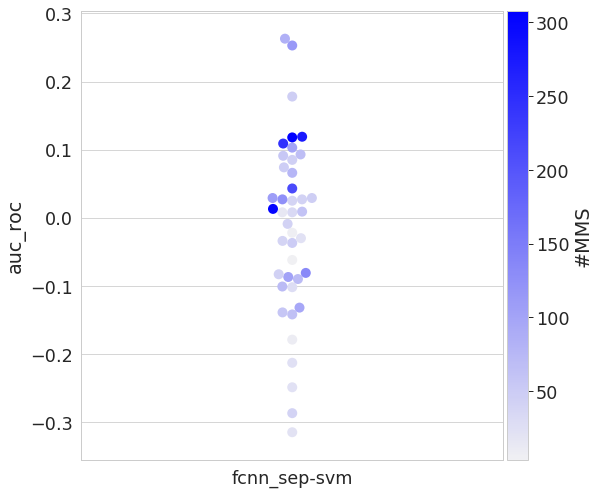

In [20]:
for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        d_fcn_svm = fcn_sep[metric] - svm[metric]
        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(8, 8.27))

        ax      = sns.swarmplot(x=['fcnn_sep-svm']*svm.shape[0], y=d_fcn_svm, hue=fcn[color_col], data=None, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        
        plt.savefig('./Score_axv/swarm_performance_%s/swarm_(fcnn_sep-mpn)_%s_color%s.png' %(type, metric, color_col))

In [ ]:
for color_col in ['#tr', '#ac_tr', 'thres', '#MMS']:
    for metric in ['matthews_coeff', 'auc_roc']:

        d_mpn_svm = mpn_sep[metric] - svm[metric]
        #Create a matplotlib colormap from the sns seagreen color palette
        cmap    = sns.light_palette("blue", reverse=False, as_cmap=True )
        # Normalize to the range of possible values from df["c"]
        norm = matplotlib.colors.Normalize(vmin=all_score[color_col].min(), vmax=all_score[color_col].max())
        # create a color dictionary (value in c : color from colormap) 
        colors = {}
        for cval in all_score[color_col]:
            colors.update({cval : cmap(norm(cval))})

        sns.set(font_scale=2.0, context='paper', style='whitegrid')
        margin  = 0.15 # bottom margin
        fig, ax = plt.subplots(figsize=(8, 8.27))

        ax      = sns.swarmplot(x=['mpnn_sep-svm']*svm.shape[0], y=d_mpn_svm, hue=fcn[color_col], data=None, ax=ax, size=2.0*5, palette=colors)
        plt.gca().legend_.remove()

        ## create colorbar ##
        divider = make_axes_locatable(plt.gca())
        ax_cb = divider.new_horizontal(size="5%", pad=0.05)
        fig.add_axes(ax_cb)
        cb1 = matplotlib.colorbar.ColorbarBase(ax_cb, 
                                            cmap = cmap,
                                            norm = norm,
                                            orientation = 'vertical')
        cb1.set_label(color_col)
        
        plt.savefig('./Score_axv/swarm_(mpnn_sep-mpn)_%s_color%s.png' %(type, metric, color_col))